# Zadanie 1

Przypomnij sobie z wykładu i ewentualnie z wcześniejszych przedmiotów, jakie są cele i zastosowania algorytmów tworzenia skupień. Zapisz odpowiedź poniżej (ta część tego pytania nie jest oceniana).

Przeanalizuj dokładnie rozdział 2.3.1 z dokumentacji scikit. Patrząc na macierz obrazków odpowiedz na pytanie: mając dany rozkład obserwacji (wiersze), jak chciał(a)bym żeby zachował się idealny algorytm wykrywania skupień? Możesz zacząć od ostatniego wiersza (tam, gdzie mamy równomierny rozkład obserwacji) i eliminować algorytmy, które nie spełniają Twoich kryteriów. Pamiętaj jednak, że większość z nich wymaga podania parametrów (tabela pod rysunkami), i te parametry niekoniecznie zostały najlepiej dostosowane do konkretnego rozkładu przypadków. Opisz swoje wnioski z analizy tej macierzy obrazków.

Cele klasteryzacji to grupowanie podobnych obiektów, odkrywanie struktury danych i uproszczenie analizy. Stosuje się ją m.in. w segmentacji klientów, wykrywaniu anomalii i analizie obrazów.

Idealny algorytm powinien wykrywać skupienia wtedy, gdy rzeczywiście istnieją, a w przypadku losowego rozkładu – nie tworzyć sztucznych klastrów. Na przykład DBSCAN dobrze rozpoznaje brak struktury w równomiernym rozkładzie, podczas gdy KMeans dzieli dane na siłę. Przy skomplikowanych kształtach, takich jak półksiężyce czy spirale, lepiej sprawdzają się DBSCAN i Spectral Clustering, bo nie zakładają kulistych klastrów. KMeans działa dobrze tylko przy wyraźnych, kulistych skupieniach.

Nie ma jednego najlepszego algorytmu – wybór zależy od danych i odpowiedniego doboru parametrów. Idealny algorytm powinien być elastyczny, odporny na szum i nie wymuszać podziału, gdy nie ma ku temu podstaw.

# Zadanie 2

Pobierz plik o nazwie odpowiadającej Twojemu numerowi albumu. Nasze dane wyjściowe to 12 głosek, wypowiedzianych – dla głosek, dla których to ma sens – w 4 różnych wysokościach. Ze środka każdej głoski (których jest 12*4) wybieramy krótką porcję próbek (np. 256, około 1/200 sekundy) i z tej porcji wyznaczamy moc poszczególnych częstotliwości za pomocą FFT. To, co mamy w pliku jako atrybuty warunkowe, to właśnie amplitudy poszczególnych częstotliwości (podgląd). Ostatnia kolumna to atrybut (liczba) niosący informację o tym, której wysokości i której głoski dotyczy dany wiersz. W tym atrybucie setki (100, 200, 300, 400) mówią o wysokości wypowiedzi (1, 2, 3, 4), natomiast reszta liczby mówi o numerze głoski (0-11).

Zatem zamiana tej liczby (etykiety, atrybutu "decyzyjnego") na znak odpowiadający głosce wygląda tak:
```python
    GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
    data = np.genfromtxt('data.txt', delimiter='\t')
    print(data.shape)
    X = data[:,:-1]
    print(X.shape)
    y = data[:,-1].astype(int)
    etykiety = [GLOSKI[nr%100]+str(nr//100) for nr in y]  # ['a1', 'e1', 'i1', .., 'r1', 'a2', 'e2', .., 'r4']
```
Zanim jeszcze wykonasz jakiekolwiek eksperymenty obliczeniowe, zastanów się dokładnie nad oczekiwanym rezultatem. Wiedza dotycząca przetwarzania dźwięku i głosu, rozpoznawania mowy, komunikacji człowiek-komputer może tu pomóc.

Jakiego rozkładu tych 12*4 przypadków w przestrzeni atrybutów warunkowych się spodziewamy? Które przypadki będą bliżej siebie, a które dalej w przestrzeni amplitud częstotliwości? Jak (o ile w ogóle) pogrupują się przypadki?

Jak myślisz, które głoski mogą okazać się trudne do przydzielenia do konkretnych skupisk dlatego, że mogą być "pomiędzy" różnymi głoskami albo mogą przypominać raz takie, raz inne głoski – w zależności od tego, w które miejsce sygnału trafimy wybierając jego króciutki fragment

W przestrzeni amplitud po FFT można się spodziewać wyodrębnienia 12 skupień odpowiadających głoskom, z wyraźnym podziałem na cztery wysokości dla każdej z nich. Samogłoski (a, e, i, o, u, y) mają charakterystyczne formanty, więc ich przypadki powinny tworzyć zwarte i rozdzielne skupiska. Głoski te o podobnym brzmieniu (np. i i y) mogą znajdować się bliżej siebie.

Spółgłoski dźwięczne (sz, z, ź, ż, g, r) mogą tworzyć mniej wyraźne skupienia – ich widmo zależy od kontekstu i momentu próbki, szczególnie w przypadku głosek takich jak r czy ż, które mogą przypominać inne dźwięki. Można się spodziewać, że głoski te będą czasem „między” skupieniami, co utrudni ich jednoznaczną klasyfikację.

Wysokość głosu wpływa głównie na częstotliwość podstawową i przesunięcie formantów, więc przypadki tej samej głoski w różnych wysokościach będą tworzyć podgrupy wewnątrz jednego klastra. Mimo tego, nadal powinny być bliżej siebie niż inne głoski.

# Zadanie 3

Ponieważ mamy kilkadziesiąt wymiarów (atrybutów warunkowych), chcielibyśmy coś powiedzieć o tych danych bez ich poważnego transformowania. Dlatego zwizualizuj przypadki za pomocą PCA w dwóch wymiarach; załącz obrazek i podaj zachowany po transformacji do 2D procent wariancji. Oczywiście podczas transformacji nie używaj atrybutu "decyzyjnego", jednak użyj go po to, żeby dodać etykiety do przypadków.

Może przydać się fragment kodu:
```python
   plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
   for i,pair in enumerate(X_reduced):
      ax.text(pair[0], pair[1], etykiety[i])
```
Czy Twoje wcześniejsze przewidywania co do rozkładu przypadków w przestrzeni i ewentualnej trudności niektórych głosek sprawdziły się, czy nie? Dlaczego? Czy transformacja do 2D (lub 3D, jeśli wolisz) pozwala nam z zadowalającym przekonaniem wnioskować o tym, jak wygląda oryginalna przestrzeń?

Explained variance in 2D: 0.7645


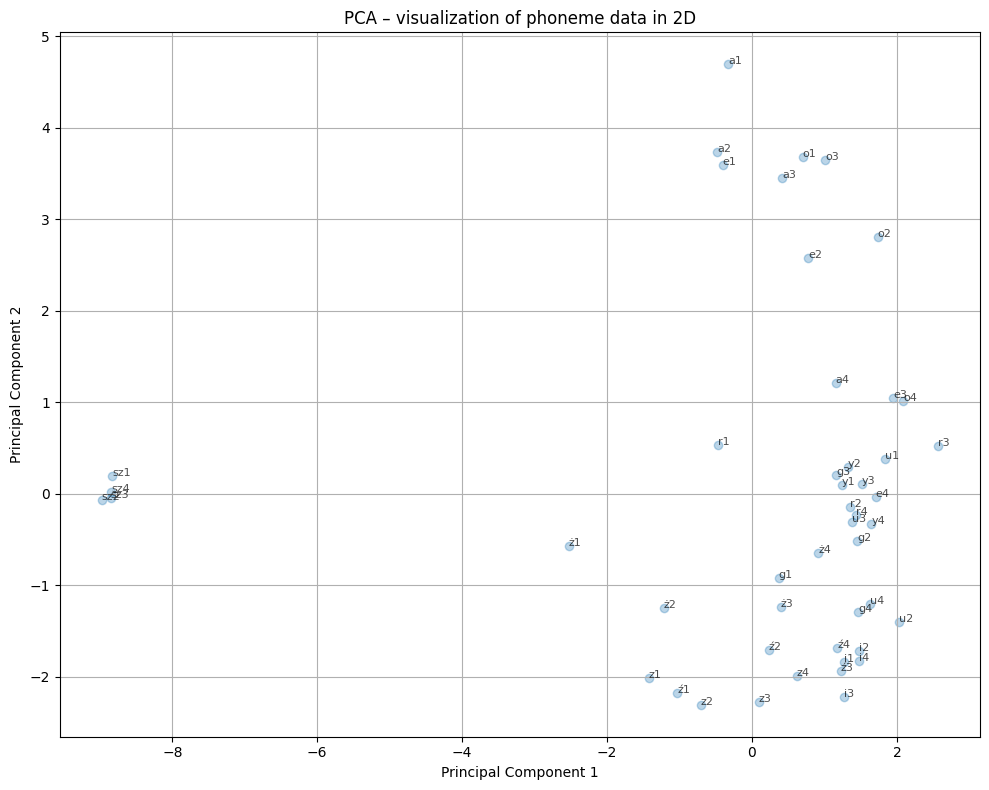

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
data = np.genfromtxt('151813-clustersel.txt', delimiter='\t')
X = data[:, :-1]
y = data[:, -1].astype(int)
labels = [GLOSKI[nr % 100] + str(nr // 100) for nr in y]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained variance in 2D: {variance:.4f}")

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)

for i, (x, y) in enumerate(X_pca):
    ax.text(x, y, labels[i], fontsize=8, alpha=0.7)

plt.title("PCA – visualization of phoneme data in 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

Wcześniejsze przewidywania co do rozkładu przypadków nie do końca się sprawdziły. Choć głoska "sz" rzeczywiście wyraźnie odseparowała się od reszty, pozostałe głoski są mocno rozproszone i nie tworzą wyraźnych, jednoznacznych skupisk. Zdarza się, że te same głoski pojawiają się blisko siebie, ale nie jest to regułą.

Zachowana wariancja po redukcji do 2D wynosi 76%, co oznacza, że transformacja PCA zachowała większość struktury danych. To pozwala na wstępne wnioskowanie o rozkładzie w przestrzeni oryginalnej. Wysoki poziom zachowanej wariancji sugeruje, że układ danych w 2D odzwierciedla główne zależności obecne w danych wejściowych.

# Zadanie 4

Ponieważ wiemy już co nieco o tym, jak rozmieszczone są przypadki w przestrzeni, pora na kolejną (nieocenianą) hipotezę. Mamy 12 głosek w 4 wysokościach wypowiedzi.
- Powiedzmy, że mamy wiedzę *a priori* o tym, że głosek w zbiorze próbek dźwiękowych jest 12, więc postanawiamy szukać właśnie `k=12` skupień (w oryginalnej przestrzeni atrybutów, a nie po redukcji PCA). Jak można się spodziewać, jak zachowa się k-means: czy 12 skupień będzie odpowiadało poszczególnym głoskom?
- A jeśli postawimy sobie za cel znaleźć `k=2` duże skupienia: samogłoski i spółgłoski, to jaki będzie efekt? Czy odkryte skupiska będą odpowiadały faktycznym podziałom przypadków na samogłoski i spółgłoski, tak, jak to wskazuje klasa z atrybutu decyzyjnego?
- A jeśli bazując na wiedzy *a priori* o 4 wysokościach wypowiedzi ustawimy `k=4`, to czy odkryte skupiska odzwierciedlą 4 wysokości wypowiedzi?


Dla `k=12` algorytm k-means **może odkryć skupiska odpowiadające** poszczególnym głoskom, ponieważ można się spodziewać, że różnice między głoskami mają duży wpływ na rozkład cech akustycznych, co częściowo widać na wykresie PCA.

Dla `k=2` algorytm k-means **raczej nie odkryje skupisk odpowiadających** podziałowi na samogłoski i spółgłoski, ponieważ różnice między tymi dwiema grupami mogą być mniej wyraźne w krótkim fragmencie widma częstotliwości. Dodatkowo, wewnętrzna różnorodność zarówno samogłosek, jak i spółgłosek może być większa niż różnice pomiędzy nimi jako grupami.

Dla `k=4` algorytm k-means **raczej nie odkryje skupisk odpowiadających** wysokościom wypowiedzi, ponieważ różnice te są subtelniejsze i mogą być przesłonięte przez większe różnice między samymi głoskami. Zatem przestrzeń cech może być bardziej zdominowana przez charakter głoski niż przez wysokość jej wypowiedzi.

Można się spodziewać, że k-means będzie w stanie uchwycić tylko **jeden dominujący rodzaj podziału** – np. na głoski – ponieważ jeśli dane można byłoby wyraźnie podzielić zarówno na 12, jak i na 4 lub 2 klastry, oznaczałoby to, że te podziały są ortogonalne w przestrzeni cech, co w przypadku rzeczywistych danych dźwiękowych jest mało prawdopodobne. W związku z tym, najbardziej prawdopodobne jest, że **najłatwiejsze do wykrycia będzie 12 skupień odpowiadających głoskom**.

# Zadanie 5

Pora na weryfikację hipotez dla k=12, 4 i 2. Użyj k-means i uzyskane centroidy pokaż czerwonymi krzyżykami w tej samej przestrzeni 2D (ewentualnie 3D, jeśli wolisz), która została wytworzona przez PCA. Zaznacz w jakiś sposób (np. ten sam kolor lub etykieta) obserwacje należące do tych samych skupisk (bazując oczywiście na oryginalnej przestrzeni atrybutów).
```python
   k_means = KMeans(init='k-means++', n_clusters=12, n_init=10)
   k_means.fit(X)
   clustercenters_trans = pca.transform(uzyskane_wspolrzedne_centroidow_kmeans)
   print('kmeans:',clustercenters_trans.shape)  # kontrola tego, że centroidy trafiły do zredukowanej przez PCA przestrzeni
   ax.scatter(clustercenters_trans[:,0], clustercenters_trans[:,1], marker='x', color='red')
   # TODO Zaznacz w jakiś sposób (np. kolor lub etykieta) obserwacje należące do tych samych skupisk
   #      (bazując na oryginalnej przestrzeni atrybutów).
```

- W odpowiedzi załącz wizualizacje.
- Czy Twoje hipotezy się sprawdziły?
- Co jest odpowiedzialne za to, że przypadki nie grupują się idealnie wedle głosek (12), wysokości wypowiedzi (4) oraz podziału na samo/spółgłoski (2), a centroidy nie trafiają idealne w środki ładnych, odseparowanych od siebie skupisk?
- Używanie surowych wartości amplitud jest niezgodne z percepcją głośności człowieka. Zlogarytmuj wszystkie amplitudy w zbiorze i wygeneruj znów wizualizacje k-means. Opisz różnice. Jeśli uważasz, że tak zdefiniowane atrybuty (tzn. po zlogarytmowaniu) są bardziej uzasadnione, używaj ich w dalszych pytaniach.

In [2]:
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib
import re

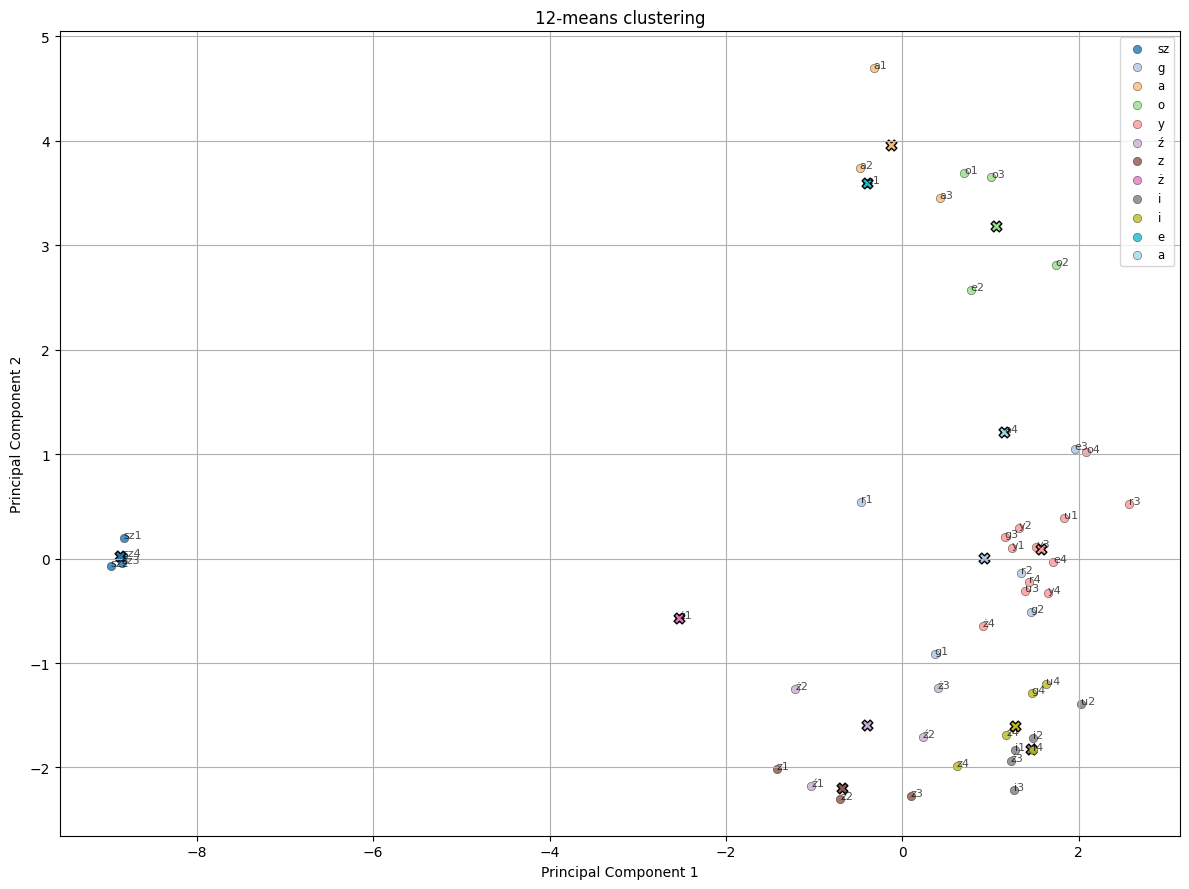

In [3]:
k = 12
k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
k_means.fit(X)
cluster_labels = k_means.labels_

centroids_pca = pca.transform(k_means.cluster_centers_)

colors = matplotlib.colormaps['tab20'].resampled(k)
fig, ax = plt.subplots(figsize=(12, 9))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c='lightgrey', alpha=0.15)

for i, (x, y) in enumerate(X_pca):
    ax.text(x, y, labels[i], fontsize=8, alpha=0.7)

for cluster_idx in range(k):
    idx = cluster_labels == cluster_idx
    cluster_names = np.array(labels)[idx]
    phonemes = [re.sub(r'\d+', '', name) for name in cluster_names]
    most_common = Counter(phonemes).most_common(1)[0][0]
    
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1],
               color=colors(cluster_idx), alpha=0.8, edgecolors='black', linewidths=0.3,
               label=most_common)
    
    ax.scatter(centroids_pca[cluster_idx, 0], centroids_pca[cluster_idx, 1],
               marker='X', color=colors(cluster_idx), s=60, edgecolors='black')

plt.title("12-means clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

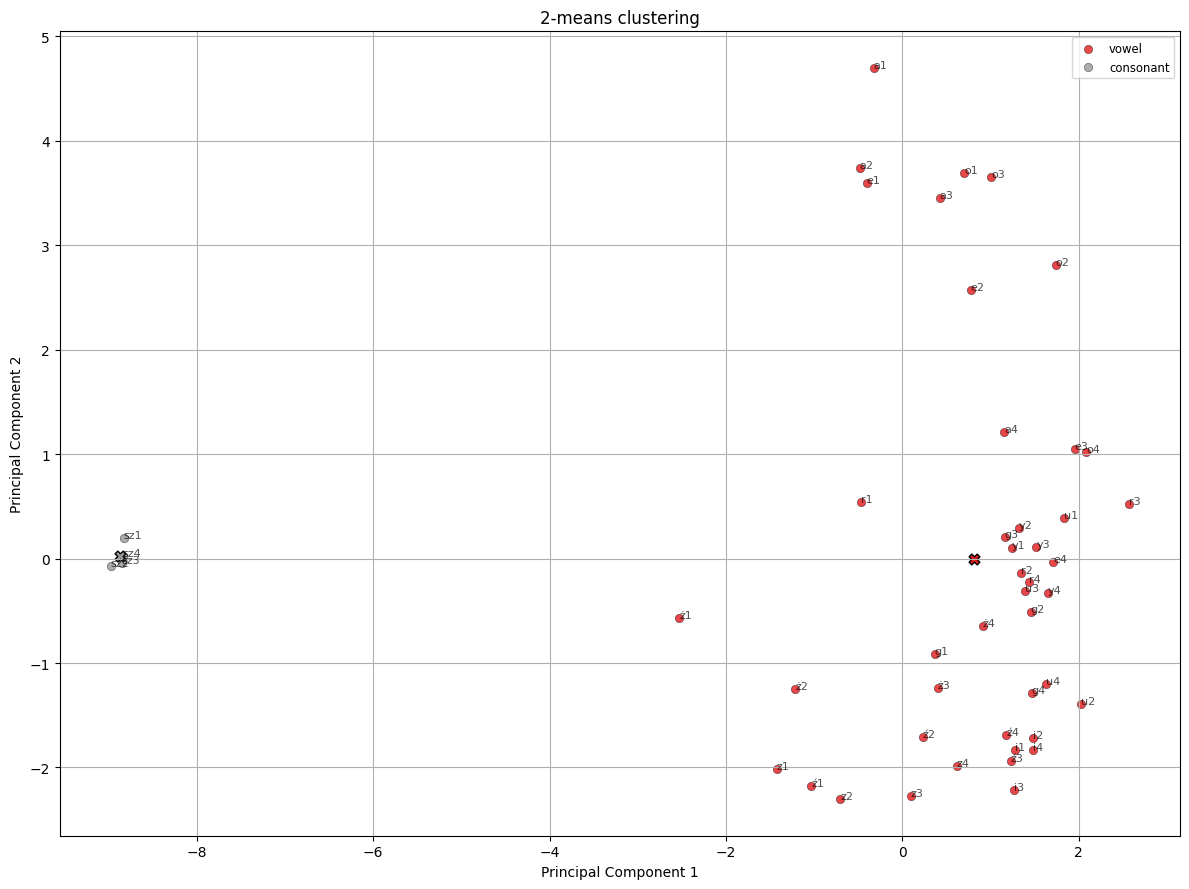

In [4]:
GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
vowels = {'a', 'e', 'i', 'o', 'u', 'y'}
consonants = set(GLOSKI) - vowels

k = 2
k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
k_means.fit(X)
cluster_labels = k_means.labels_

centroids_pca = pca.transform(k_means.cluster_centers_)

colors = matplotlib.colormaps['Set1'].resampled(k)

fig, ax = plt.subplots(figsize=(12, 9))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c='lightgrey', alpha=0.15)

for i, (x, y) in enumerate(X_pca):
    ax.text(x, y, labels[i], fontsize=8, alpha=0.7)

for cluster_idx in range(k):
    idx = cluster_labels == cluster_idx
    cluster_names = np.array(labels)[idx]
    phonemes = [re.sub(r'\d+', '', name) for name in cluster_names]
    categories = ['vowel' if ph in vowels else 'consonant' for ph in phonemes]
    most_common = Counter(categories).most_common(1)[0][0]
    
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1],
               color=colors(cluster_idx), alpha=0.8, edgecolors='black', linewidths=0.3,
               label=most_common)
    
    ax.scatter(centroids_pca[cluster_idx, 0], centroids_pca[cluster_idx, 1],
               marker='X', color=colors(cluster_idx), s=60, edgecolors='black')

plt.title("2-means clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

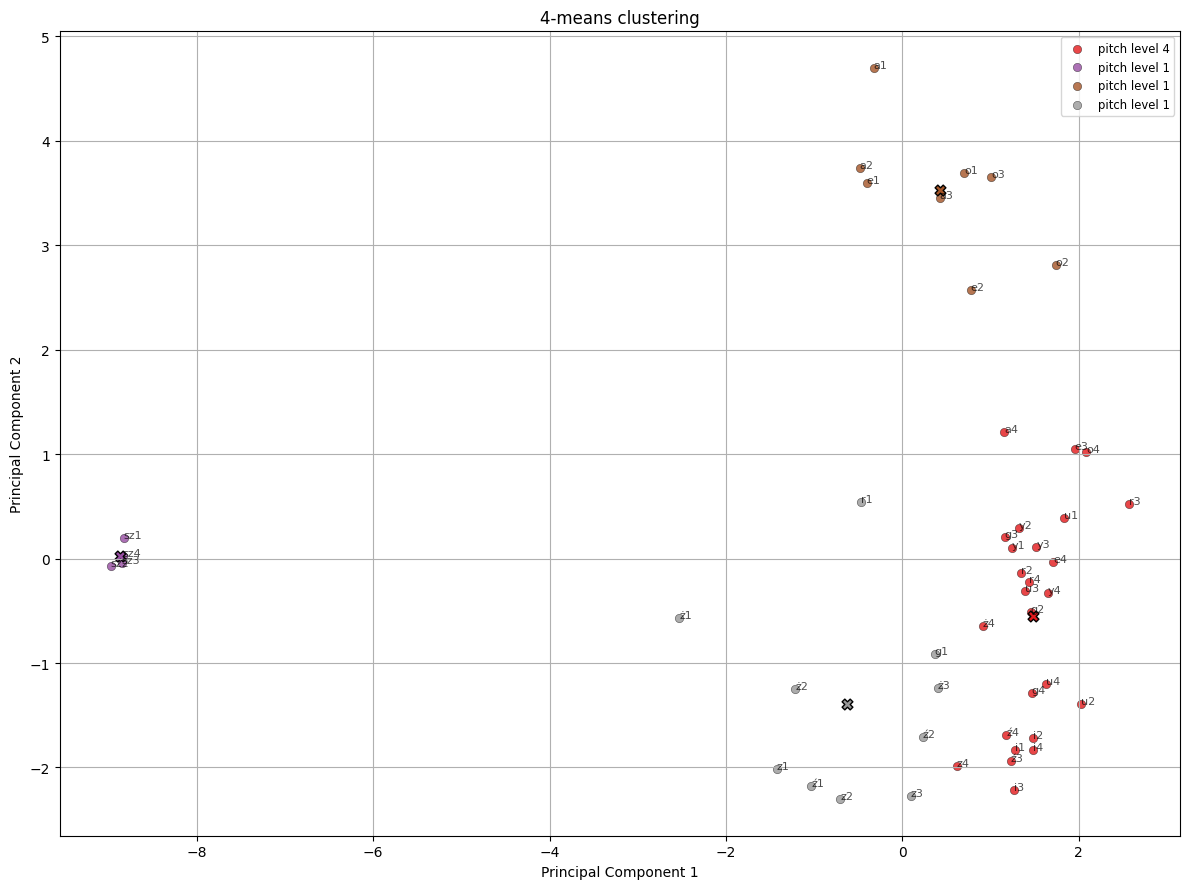

In [5]:
k = 4
k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
k_means.fit(X)
cluster_labels = k_means.labels_

centroids_pca = pca.transform(k_means.cluster_centers_)

colors = matplotlib.colormaps['Set1'].resampled(k)

fig, ax = plt.subplots(figsize=(12, 9))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c='lightgrey', alpha=0.15)

for i, (x, y) in enumerate(X_pca):
    ax.text(x, y, labels[i], fontsize=8, alpha=0.7)

for cluster_idx in range(k):
    idx = cluster_labels == cluster_idx
    cluster_names = np.array(labels)[idx]
    
    numbers = [re.sub(r'\D+', '', name) for name in cluster_names]
    most_common_number = Counter(numbers).most_common(1)[0][0]
    
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1],
               color=colors(cluster_idx), alpha=0.8, edgecolors='black', linewidths=0.3,
               label=f'pitch level {most_common_number}')
    
    ax.scatter(centroids_pca[cluster_idx, 0], centroids_pca[cluster_idx, 1],
               marker='X', color=colors(cluster_idx), s=60, edgecolors='black')

plt.title("4-means clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
epsilon = 1e-10
X_log = np.log(X + epsilon)

pca_log = PCA(n_components=2)
X_pca_log = pca_log.fit_transform(X_log)
variance_log = np.sum(pca_log.explained_variance_ratio_)
print(f"Explained variance in 2D (log data): {variance_log:.4f}")

Explained variance in 2D (log data): 0.8780


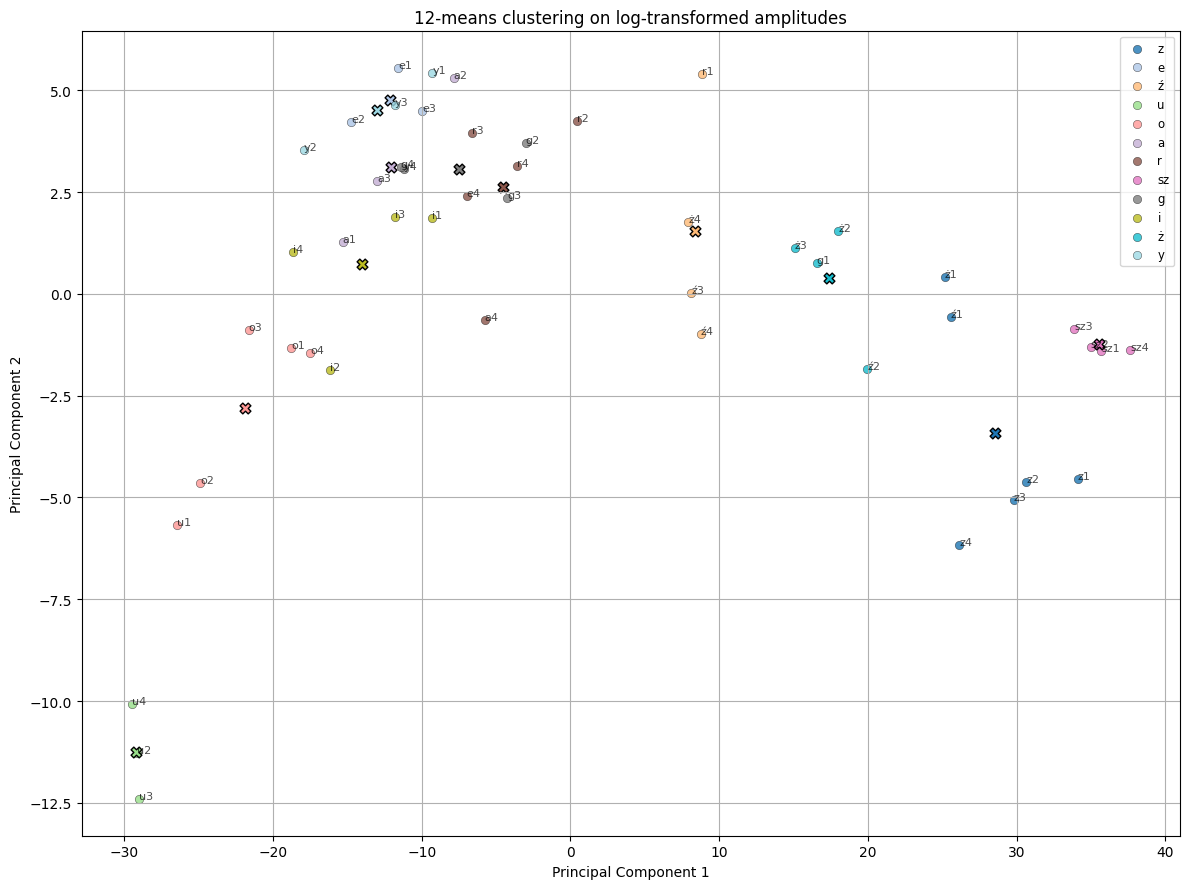

In [7]:
k = 12
k_means_log = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
k_means_log.fit(X_log)
cluster_labels_log = k_means_log.labels_
centroids_pca_log = pca_log.transform(k_means_log.cluster_centers_)

colors = matplotlib.colormaps['tab20'].resampled(k)

fig, ax = plt.subplots(figsize=(12, 9))
ax.scatter(X_pca_log[:, 0], X_pca_log[:, 1], c='lightgrey', alpha=0.15)

for i, (x, y) in enumerate(X_pca_log):
    ax.text(x, y, labels[i], fontsize=8, alpha=0.7)

for cluster_idx in range(k):
    idx = cluster_labels_log == cluster_idx
    cluster_names = np.array(labels)[idx]
    phonemes = [re.sub(r'\d+', '', name) for name in cluster_names]
    most_common = Counter(phonemes).most_common(1)[0][0]

    ax.scatter(X_pca_log[idx, 0], X_pca_log[idx, 1],
               color=colors(cluster_idx), alpha=0.8, edgecolors='black', linewidths=0.3,
               label=most_common)

    ax.scatter(centroids_pca_log[cluster_idx, 0], centroids_pca_log[cluster_idx, 1],
               marker='X', color=colors(cluster_idx), s=60, edgecolors='black')

plt.title("12-means clustering on log-transformed amplitudes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

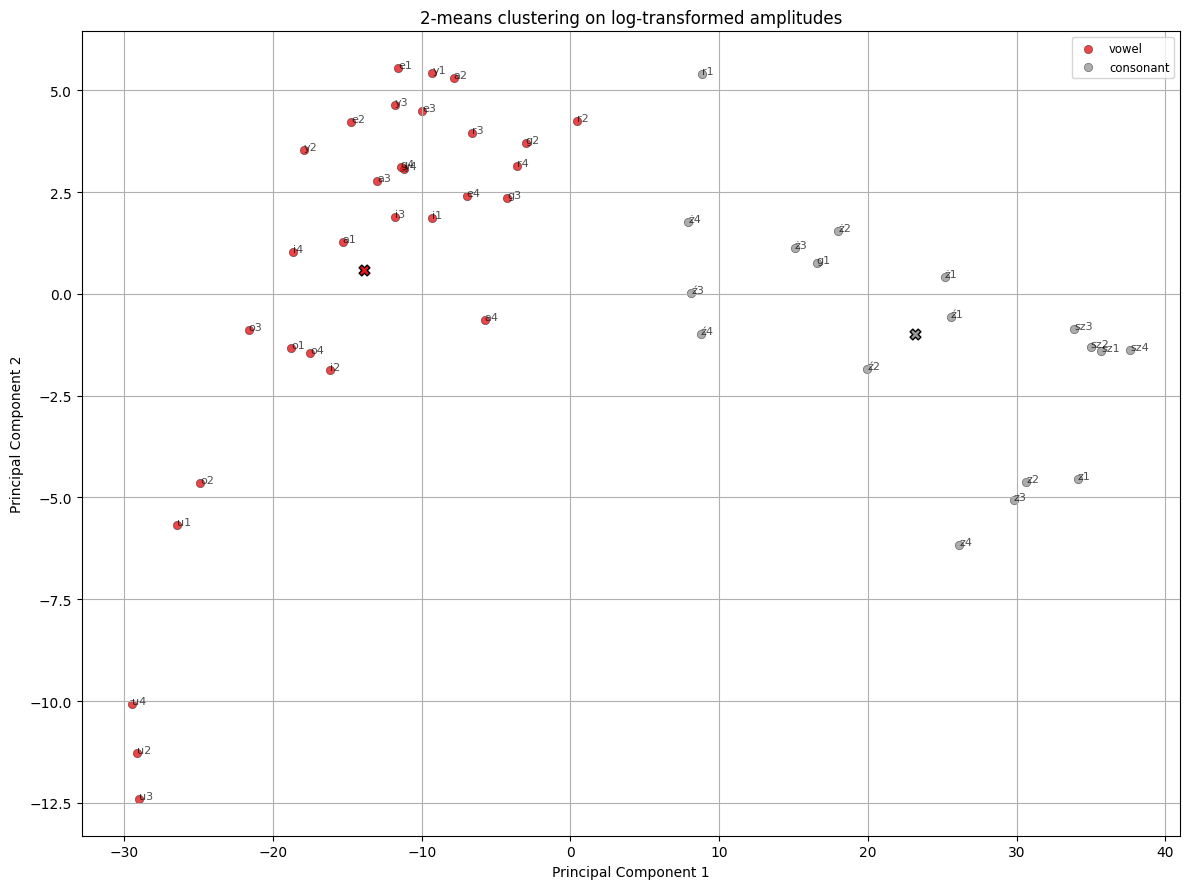

In [8]:
k = 2
k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
k_means.fit(X_log)
cluster_labels = k_means.labels_

centroids_pca = pca_log.transform(k_means.cluster_centers_)

colors = matplotlib.colormaps['Set1'].resampled(k)

fig, ax = plt.subplots(figsize=(12, 9))
ax.scatter(X_pca_log[:, 0], X_pca_log[:, 1], c='lightgrey', alpha=0.15)

for i, (x, y) in enumerate(X_pca_log):
    ax.text(x, y, labels[i], fontsize=8, alpha=0.7)

GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
vowels = {'a', 'e', 'i', 'o', 'u', 'y'}
consonants = set(GLOSKI) - vowels

for cluster_idx in range(k):
    idx = cluster_labels == cluster_idx
    cluster_names = np.array(labels)[idx]
    phonemes = [re.sub(r'\d+', '', name) for name in cluster_names]
    categories = ['vowel' if ph in vowels else 'consonant' for ph in phonemes]
    most_common = Counter(categories).most_common(1)[0][0]

    ax.scatter(X_pca_log[idx, 0], X_pca_log[idx, 1],
               color=colors(cluster_idx), alpha=0.8, edgecolors='black', linewidths=0.3,
               label=most_common)

    ax.scatter(centroids_pca[cluster_idx, 0], centroids_pca[cluster_idx, 1],
               marker='X', color=colors(cluster_idx), s=60, edgecolors='black')

plt.title("2-means clustering on log-transformed amplitudes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


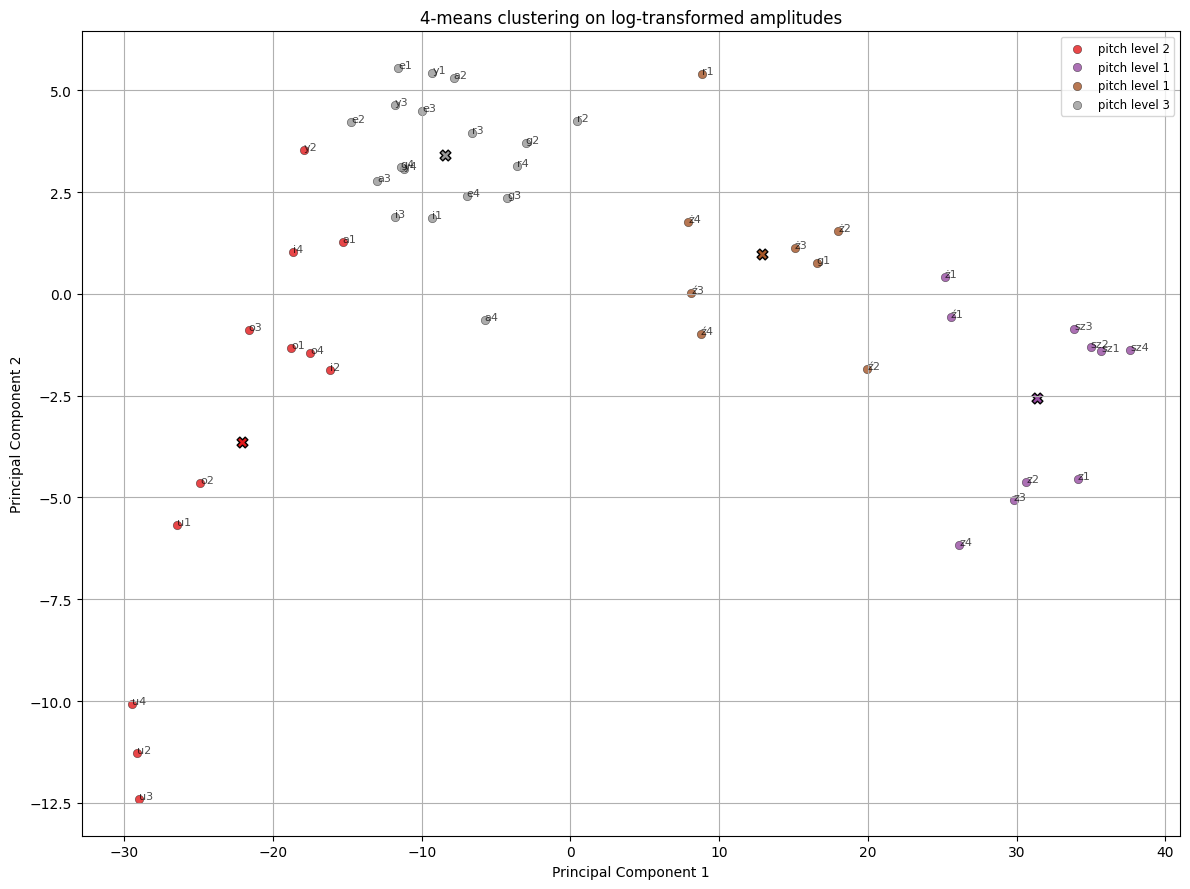

In [9]:
k = 4
k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
k_means.fit(X_log)
cluster_labels = k_means.labels_

centroids_pca = pca_log.transform(k_means.cluster_centers_)

colors = matplotlib.colormaps['Set1'].resampled(k)

fig, ax = plt.subplots(figsize=(12, 9))
ax.scatter(X_pca_log[:, 0], X_pca_log[:, 1], c='lightgrey', alpha=0.15)

for i, (x, y) in enumerate(X_pca_log):
    ax.text(x, y, labels[i], fontsize=8, alpha=0.7)

for cluster_idx in range(k):
    idx = cluster_labels == cluster_idx
    cluster_names = np.array(labels)[idx]
    
    # Extract only the number (pitch level) from the label
    numbers = [re.sub(r'\D+', '', name) for name in cluster_names]
    most_common_number = Counter(numbers).most_common(1)[0][0]
    
    ax.scatter(X_pca_log[idx, 0], X_pca_log[idx, 1],
               color=colors(cluster_idx), alpha=0.8, edgecolors='black', linewidths=0.3,
               label=f'pitch level {most_common_number}')
    
    ax.scatter(centroids_pca[cluster_idx, 0], centroids_pca[cluster_idx, 1],
               marker='X', color=colors(cluster_idx), s=60, edgecolors='black')

plt.title("4-means clustering on log-transformed amplitudes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


W dużej mierze uprzednio stawiane hipotezy się potwierdziły. Dla k=12 podział na głoski był najlepszy i dawał najbardziej widoczne skupiska. Dla k=2 (podział na samogłoski i spółgłoski) oraz k=4 (wysokość głosu) wyniki były słabsze — dla k=2 wydzielił się głównie głos „sz”, a k=4 w ogóle nie uchwycił różnic wysokości głosu.

Przyczyny nieidealnego grupowania i niedokładnego umiejscowienia centroidów to nakładanie się cech akustycznych między klasami, duża zmienność wewnątrz klas, szumy oraz znaczące różnice w wartościach maksymalnych amplitud. 

Logarytmowanie amplitud znacząco poprawiło wyniki. Po zlogarytmowaniu PCA zachowało znacznie więcej wariancji (około 87%), a grupowania k-means dla k=12 i k=2 były niemal idealne — wyraźnie oddzieliły głoski oraz podział na samogłoski i spółgłoski. Niestety, dla k=4 (wysokości głosu) nadal nie udało się uchwycić sensownych skupisk, choć logarytmowanie wprowadziło istotny zysk jakościowy. 

Zatem logarytmowanie amplitud jest bardziej uzasadnione i warto je stosować w dalszych analizach.

# Zadanie 6

Zbudujemy teraz metodą sklearn.cluster.AgglomerativeClustering inną reprezentację skupień – dendrogram. Tak tak, to taka sama reprezentacja, której używają biolodzy do popularnych wizualizacji zależności przodek-potomek lub podobieństwa fenetycznego albo genetycznego. Biolodzy nawet, przy pewnych założeniach, wnioskują na podstawie tej reprezentacji o czasie, który upłynął pomiędzy poszczególnymi zdarzeniami w ewolucji. Informatycy też czasem stosują tę reprezentację w podobnym celu.

W naszym przypadku chcemy narysować całe drzewo, więc używamy
```python
   plot_dendrogram(model, labels=etykiety)
   ```
- Załącz uzyskany obrazek.
- Jak oceniasz ten rodzaj reprezentacji w porównaniu do wcześniej stosowanych centroidów w przestrzeni atrybutów? Czy niesie więcej, czy mniej informacji?
- Porównując uzyskany efekt z "ground truth" (idealnym podziałem zgodnym z atrybutem decyzyjnym, którego ta metoda przecież nie znała) – czy uważasz, że grupowanie jest sensowne i się powiodło, czy nie?
- A może algorytm ma więcej racji od atrybutu decyzyjnego i ujawnia więcej, niż "ground truth"?

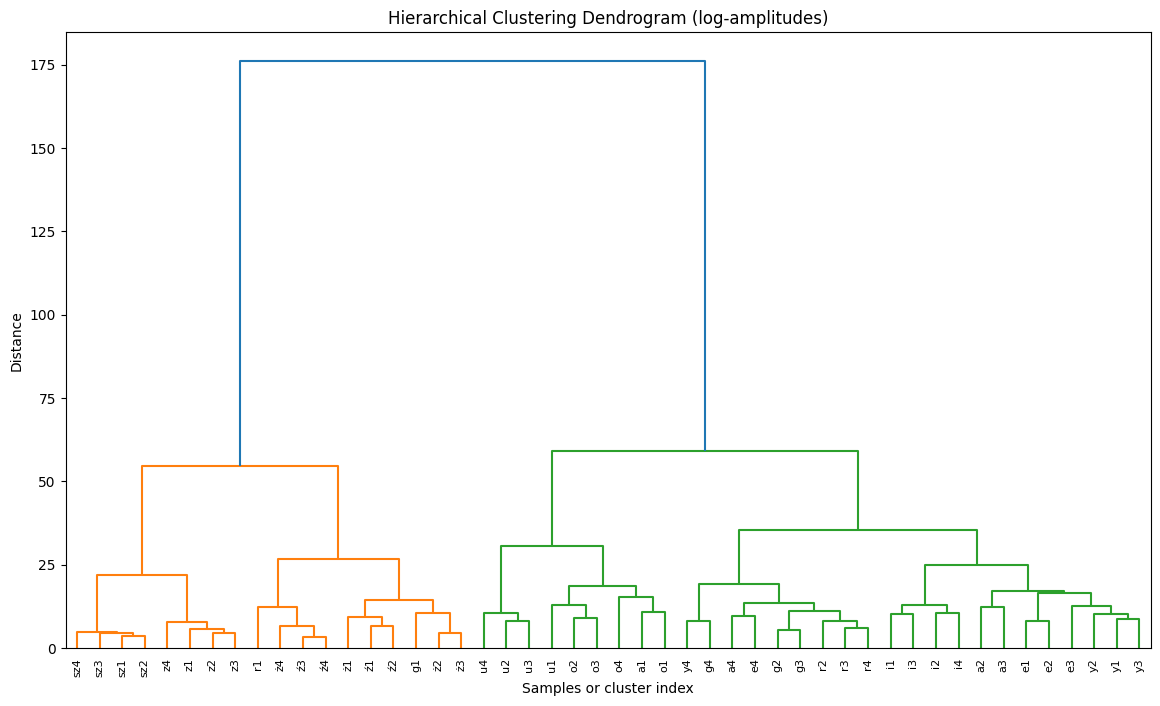

In [10]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = model.fit(X_log)

plt.figure(figsize=(14, 8))
plt.title("Hierarchical Clustering Dendrogram (log-amplitudes)")
plot_dendrogram(model, labels=labels, truncate_mode=None)
plt.xlabel("Samples or cluster index")
plt.ylabel("Distance")
plt.show()

Dendrogram niesie więcej informacji, ponieważ pokazuje całą hierarchię podziałów naraz, a centroidy tylko końcowy podział na klastry. Dzięki dendrogramowi można zauważyć relacje i podobieństwa między grupami na różnych poziomach.

Grupowanie jest sensowne — widać wyraźny podział na samogłoski i spółgłoski oraz poszczególne głoski. Wyjątkiem jest głoska „r”, która trafia do samogłosek, co nie jest fonetycznie uzasadnione.

Algorytm może ujawniać więcej niż "ground truth", pokazując dodatkowe niuanse i hierarchię podobieństw, których klasyfikacja "ground truth" nie zawiera.

# Zadanie 7

Wszystkie wcześniejsze eksperymenty były częściowo nierealistyczne, bo dysponowaliśmy etykietami (atrybut decyzyjny), które ukrywaliśmy przed algorytmem tworzenia skupień, a potem pokazywaliśmy je sami sobie po to żeby ocenić, czy algorytmowi się "udało". Pomyśl, jakie wnioski wyciągnęlibyśmy w poprzednich zadaniach patrząc na wyniki działania algorytmów grupowania, gdybyśmy nic nie wiedzieli o tym, że w danych są 4 wysokości wypowiedzi 12 głosek – gdybyśmy tylko wiedzieli, że każdy z 48 przypadków reprezentuje jakiś dźwięk.

Wyobraźmy teraz sobie, że mamy takie same krótkie fragmenty dźwięku jak poprzednio (każdy fragment to np. 256 próbek z nagrania audio, około 1/200 sekundy), ale tym razem nie są to precyzyjnie wybrane środki specjalnie wypowiadanych, czystych głosek, tylko tysiące zupełnie przypadkowo wybranych fragmentów z mowy ciągłej (wypowiadanej monotonnie czyli bez wahań wysokości dźwięku, z usuniętymi okresami ciszy między wyrazami). Tak jak poprzednio, dla każdego takiego fragmentu liczymy FFT – i amplitudy częstotliwości, dokładnie tak jak poprzednio, stanowią atrybuty warunkowe. Tym razem jednak nie mamy atrybutu decyzyjnego żeby oceniać algorytm – to jest faktyczne uczenie nienadzorowane, a nasze dane to po prostu duża próba dźwięków występujących w mowie polskiej (ograniczona w tym rozważaniu do jednego mówcy).

Jak myślisz, jaka będzie struktura takich przypadków w przestrzeni atrybutów? Czy utworzą jakieś skupiska, czy nie? Zapisz i uzasadnij swoją hipotezę (zadanie nieoceniane).

Można przewidywać, że fragmenty mowy ciągłej będą tworzyć luźne, częściowo zachodzące na siebie skupiska, ale nie tak wyraźne i dobrze odseparowane jak w przypadku precyzyjnie wybranych, czystych głosek. 

Wynika to z faktu, że fragmenty są losowe, mogą zawierać przejścia między głoskami, szumy, oraz różne wariacje artykulacyjne. Struktura danych będzie bardziej złożona i mniej jednoznaczna, co utrudni algorytmom grupowanie i identyfikację wyraźnych klas. 

Jednocześnie możliwe jest wyodrębnienie pewnych dominujących wzorców, na przykład typowych cech charakterystycznych dla samogłosek, spółgłosek czy fragmentów ciszy, lecz granice między nimi będą mniej ostre.

# Zadanie 8

Pobierz plik odpowiadający Twojemu numerowi albumu. Pamiętaj – teraz prowadzimy eksplorację danych nie wiedząc, na co napotkamy (czy mają jakąś strukturę?) i nie mając etykiet przypadków. Chcemy odkryć strukturę danych, o ile ona istnieje, za pomocą skupisk. Zweryfikuj swoją wcześniejszą hipotezę: zwizualizuj dane w 2D lub 3D za pomocą PCA. Podaj procent zachowanej wariancji i jego interpretację.

Następnie porównaj k-means (centroidy), DBSCAN (gęstość) i AgglomerativeClustering (hierarchia). Dla dwóch pierwszych algorytmów rysuj poszczególne przypadki jako kropki w przestrzeni PCA (2D lub 3D) – różnymi kolorami w zależności od skupiska (tak jak tutaj, ale w przestrzeni PCA). Dla dendrogramu rysuj tylko kilka najwyższych poziomów (argumenty truncate_mode='level', p=...). Załącz dowolną liczbę obrazków – taką, jaką uznasz za niezbędne, żeby zilustrować swoje obserwacje i wnioski; minimum trzy (po jednym na algorytm). Więcej obrazków może wynikać z tego, że będziesz eksperymentował(a) z różnymi wartościami parametrów, uzyskując w konsekwencji lepsze lub gorsze efekty.

Pomyśl o tym, na jakiej podstawie dobierać parametry, skoro nie mamy atrybutu decyzyjnego? Czy możemy w ogóle jakoś oceniać działanie algorytmu tworzącego skupiska w takich okolicznościach? Opcjonalnie możesz spróbować ocenić i porównać uzyskane efekty grupowania (jakość?) w zależności od parametrów (np. wymuszonej liczby skupisk) odpowiednią metryką.

Jak możemy interpretować uzyskane rezultaty? Czy te rezultaty, przy odpowiednio dobranych parametrach, mówią nam coś o analizowanych danych – w tym przypadku o mowie polskiej? (to jest naszym celem!)

Explained variance in 2D (ORIGINAL DATA): 0.7478


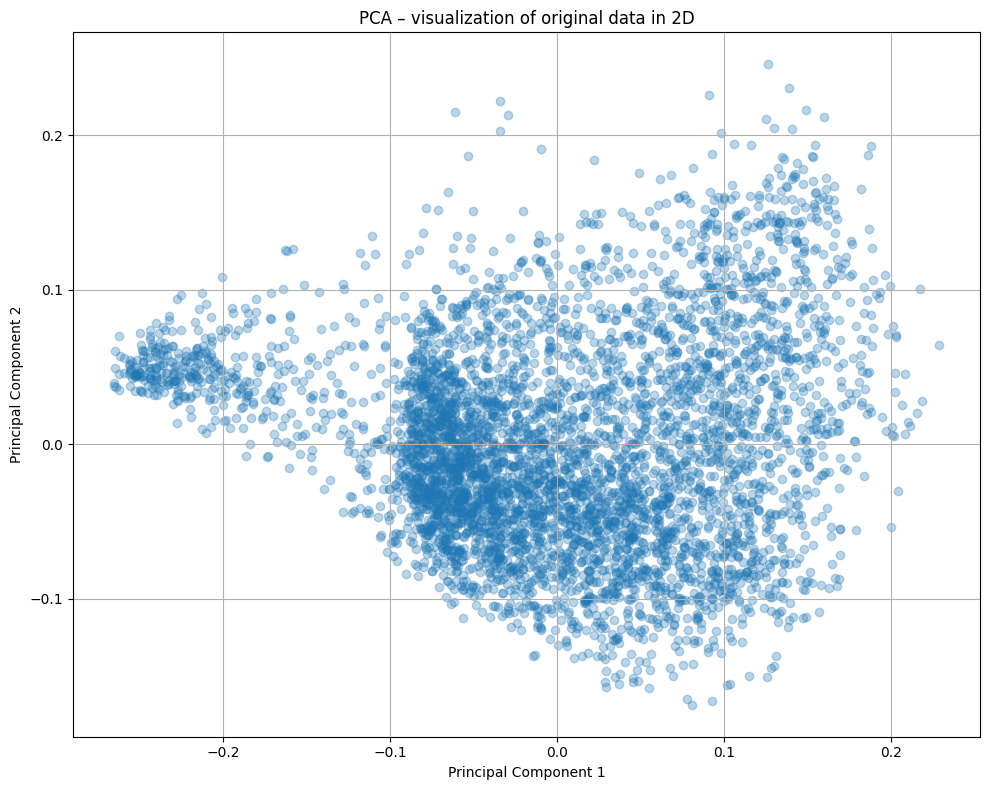

In [11]:
data = np.loadtxt('151813-cluster-contspeech.txt')

X = data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained variance in 2D (ORIGINAL DATA): {variance:.4f}")


fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.title("PCA – visualization of original data in 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

Explained variance in 2D (LOG-TRANSFORMED DATA): 0.8660


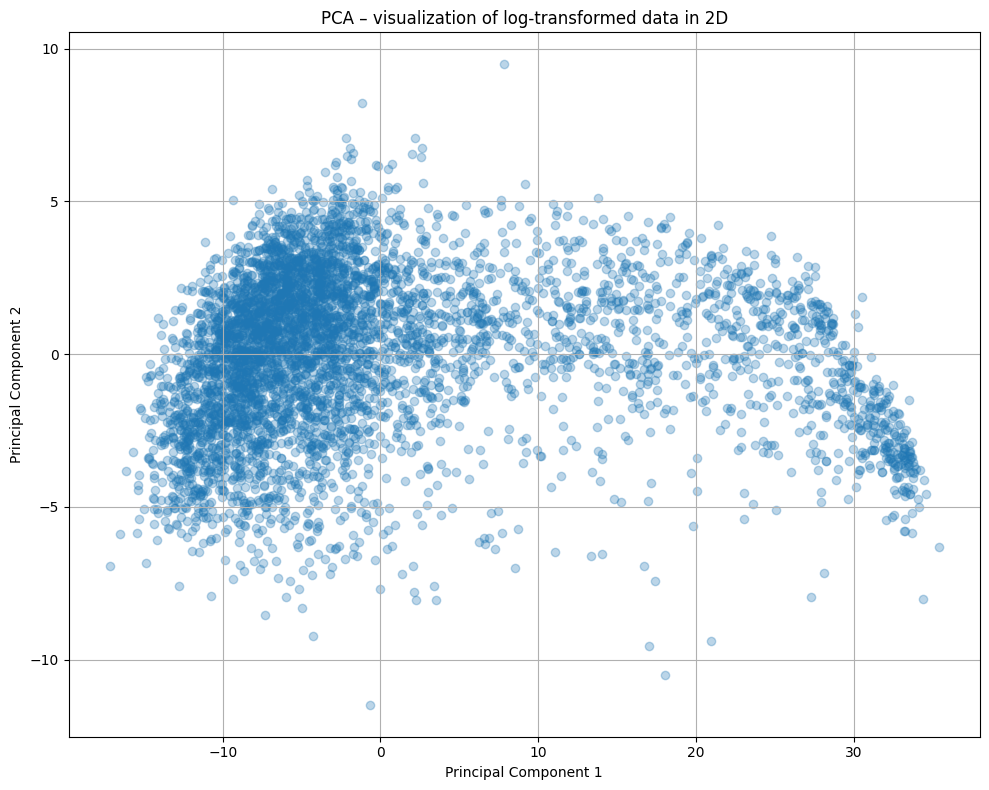

In [12]:
epsilon = 1e-10
X_log = np.log(X + epsilon)

pca_log = PCA(n_components=2)
X_pca_log = pca_log.fit_transform(X_log)
variance_log = np.sum(pca_log.explained_variance_ratio_)
print(f"Explained variance in 2D (LOG-TRANSFORMED DATA): {variance_log:.4f}")

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_pca_log[:, 0], X_pca_log[:, 1], alpha=0.3)
plt.title("PCA – visualization of log-transformed data in 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

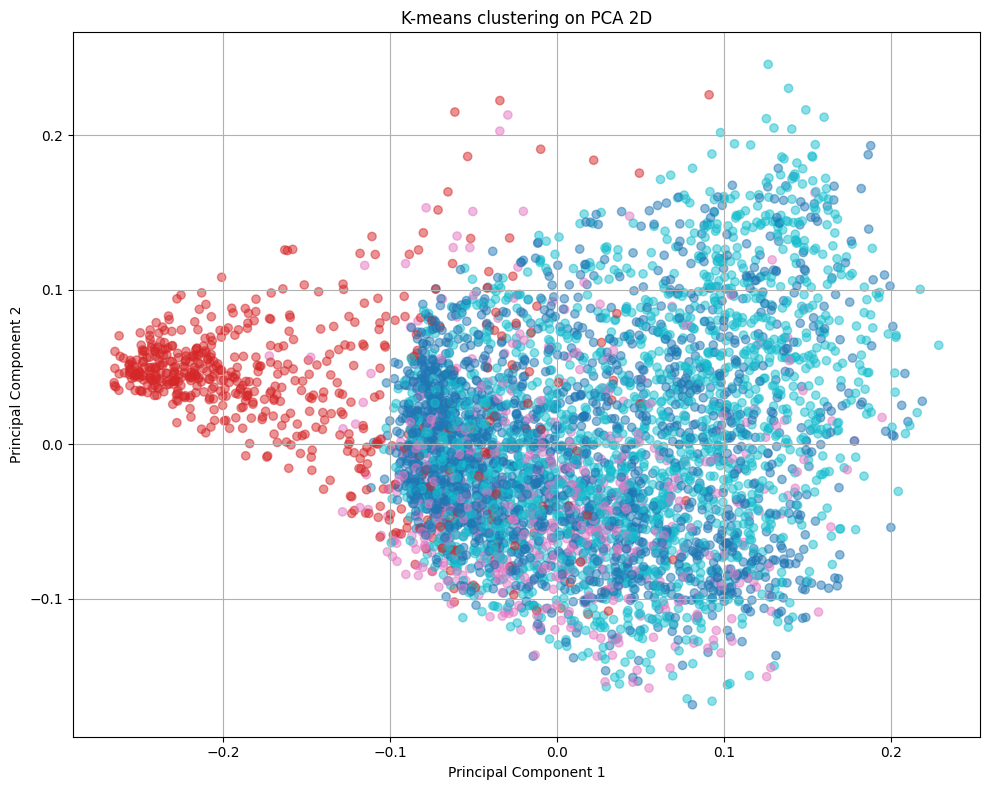

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_log)
labels_km = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_km, cmap='tab10', alpha=0.5)
plt.title("K-means clustering on PCA 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

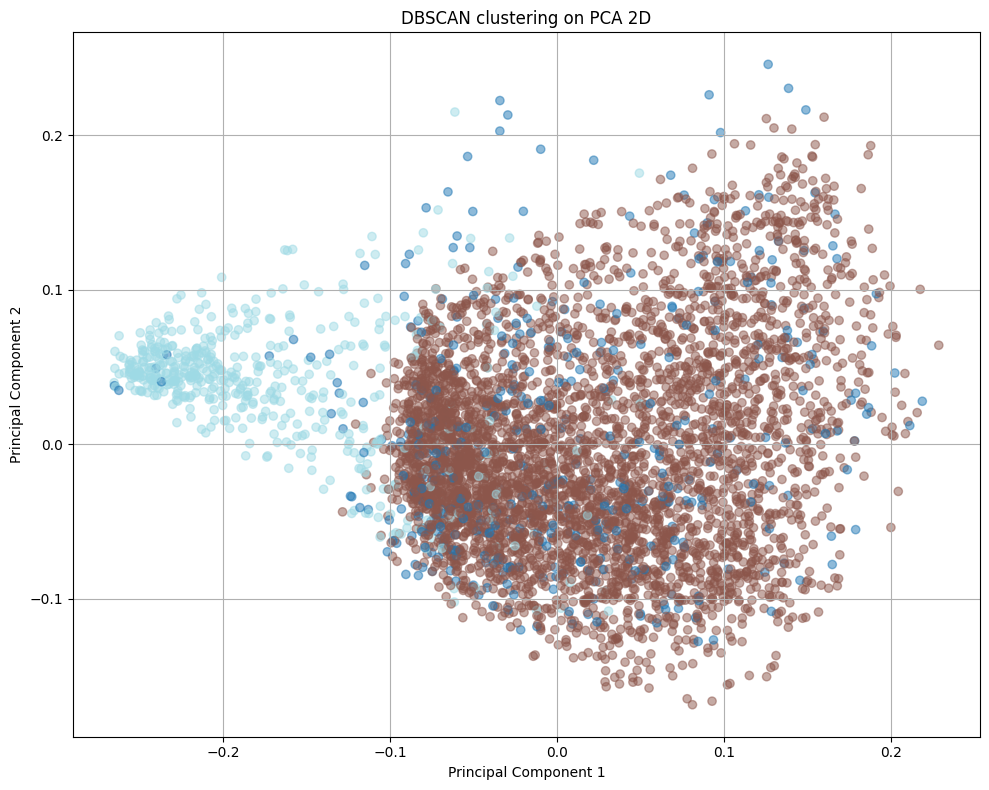

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=6, min_samples=100)
dbscan.fit(X_log)
labels_db = dbscan.labels_

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_db, cmap='tab20', alpha=0.5)
plt.title("DBSCAN clustering on PCA 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

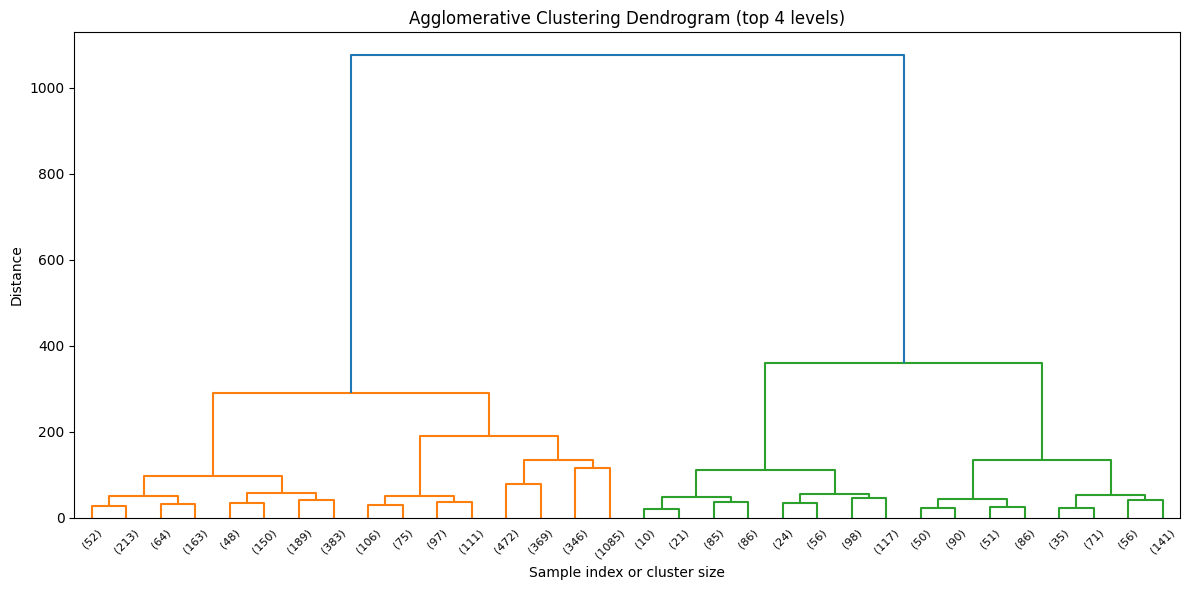

In [15]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([
        model.children_, 
        model.distances_, 
        counts
    ]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_log)

plt.figure(figsize=(12, 6))
plot_dendrogram(model, truncate_mode='level', p=4)
plt.title("Agglomerative Clustering Dendrogram (top 4 levels)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

Analiza PCA pokazała, że dwie główne składowe zachowują 86,6% wariancji dla danych zlogarytmizowanych, co wskazuje na dobrą redukcję wymiarów przy minimalnej utracie informacji. Dla danych oryginalnych wariancja była niższa (74,8%).

Dobór parametrów bez etykiet można wspierać metrykami jak silhouette score lub analizą k-distance (dla DBSCAN). Dla przykładu dla wartości eps innej niż około 6 DBSCAN tworzy jeden duży klaster, co utrudnia dalszą analizę i interpretację skupisk. Wpływ parametrów na liczbę skupisk jest zatem znaczący.

Zarówno K-means, jak i DBSCAN przy dobranych parametrach dzielą dane na dwie główne grupy, co sugeruje istnienie pewnej struktury. AgglomerativeClustering pozwala na hierarchiczne grupowanie, dając wgląd w strukturę danych przez dendrogram. Analiza i porównanie obu skupisk pozwala na lepsze zrozumienie kryteriów podziału i odkrycie wzorców w danych.

# Zadanie 9

Zobaczmy, co da zastosowanie automatycznego wykrywania skupień, gdy nasz zbiór danych będzie zawierał bardziej heterogeniczne próbki – pochodzące nie tylko z nagrania mowy, ale też z bardzo charakterystycznego instrumentu muzycznego (wymieszane w równych proporcjach). Pobierz plik odpowiadający Twojemu numerowi albumu. Podobnie jak poprzednio, prowadzimy eksplorację danych nie wiedząc, na co napotkamy (czy mają jakąś strukturę?) i nie wiedząc, które próbki pochodzą z mowy, a które z grającego instrumentu.

Sprawdźmy, czy pojawienie się próbek z instrumentu zmieniło strukturę skupień. Tak jak poprzednio, zwizualizuj dane w 2D lub 3D za pomocą PCA, kontrolując procent zachowanej wariancji i porównując ten procent z poprzednim (sama mowa). Pamiętaj, że algorytmy grupujące działają w oryginalnej przestrzeni, więc nie cierpią z powodu utraty informacji przez PCA. Pamiętaj też, że źródłowe nagranie audio jest ciągłe i ma płynne przejścia między dźwiękami, a my analizujemy próbki wybrane z zupełnie losowych miejsc, dlatego kluczowe w wizualizacji i analizie skupień będzie pojęcie gęstości (które obserwacje są popularniejsze czyli bardziej typowe, a które są rzadsze).

Porównaj k-means (centroidy), DBSCAN (gęstość) i AgglomerativeClustering (hierarchia). Dla dwóch pierwszych algorytmów rysuj poszczególne przypadki jako kropki w przestrzeni PCA (2D lub 3D) – różnymi kolorami w zależności od skupiska (tak jak tutaj, ale w przestrzeni PCA). Dla dendrogramu rysuj tylko kilka najwyższych poziomów (argumenty truncate_mode='level', p=...). Załącz dowolną liczbę obrazków – taką, jaką uznasz za niezbędne, żeby zilustrować swoje obserwacje i wnioski; minimum trzy (po jednym na algorytm).

Czy na podstawie wyników trzech algorytmów wykrywania skupień potrafisz zidentyfikować zmianę w strukturze danych, jaka zaszła po wzbogaceniu zbioru danych o nowe przypadki o odmiennej naturze? Patrząc na wizualizację PCA, jak myślisz, gdzie leżą próbki instrumentu, a gdzie mowy? Czy istnieje sposób, żeby przekonać się na 100%, czy masz rację? Hmm, skoro masz dane z poprzedniego pytania...

Explained variance in 2D (ORIGINAL DATA): 0.6900


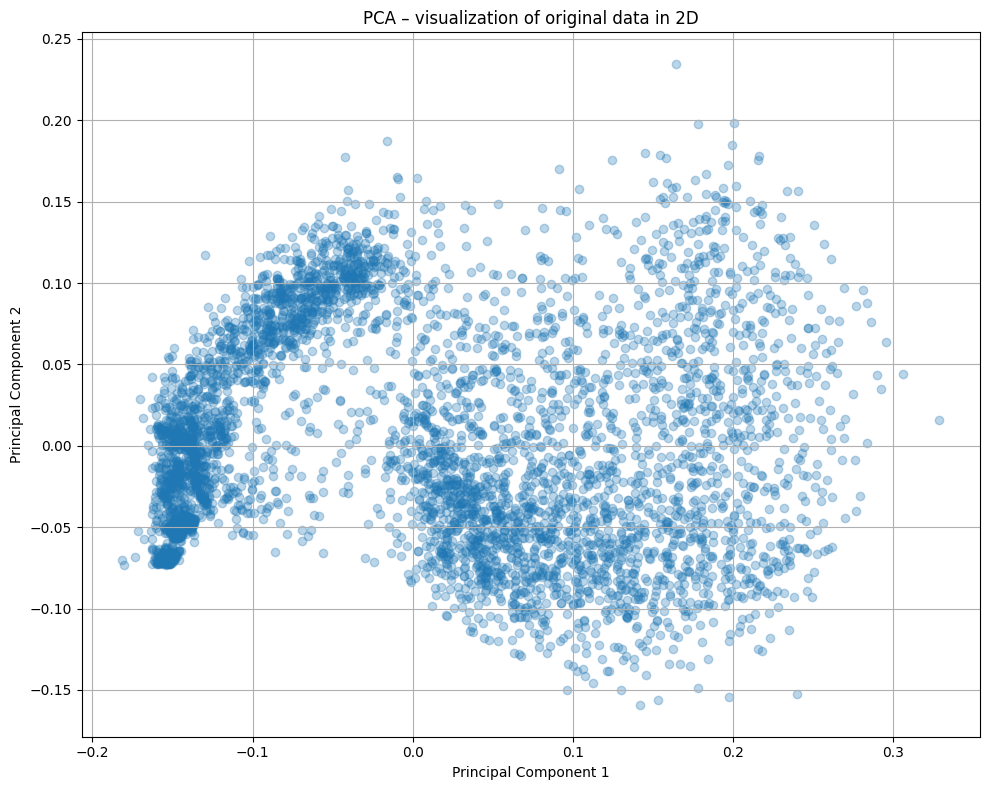

In [16]:
data = np.loadtxt('151813-cluster-contspeechviolin.txt')

X = data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained variance in 2D (ORIGINAL DATA): {variance:.4f}")


fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.title("PCA – visualization of original data in 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

Explained variance in 2D (LOG-TRANSFORMED DATA): 0.6944


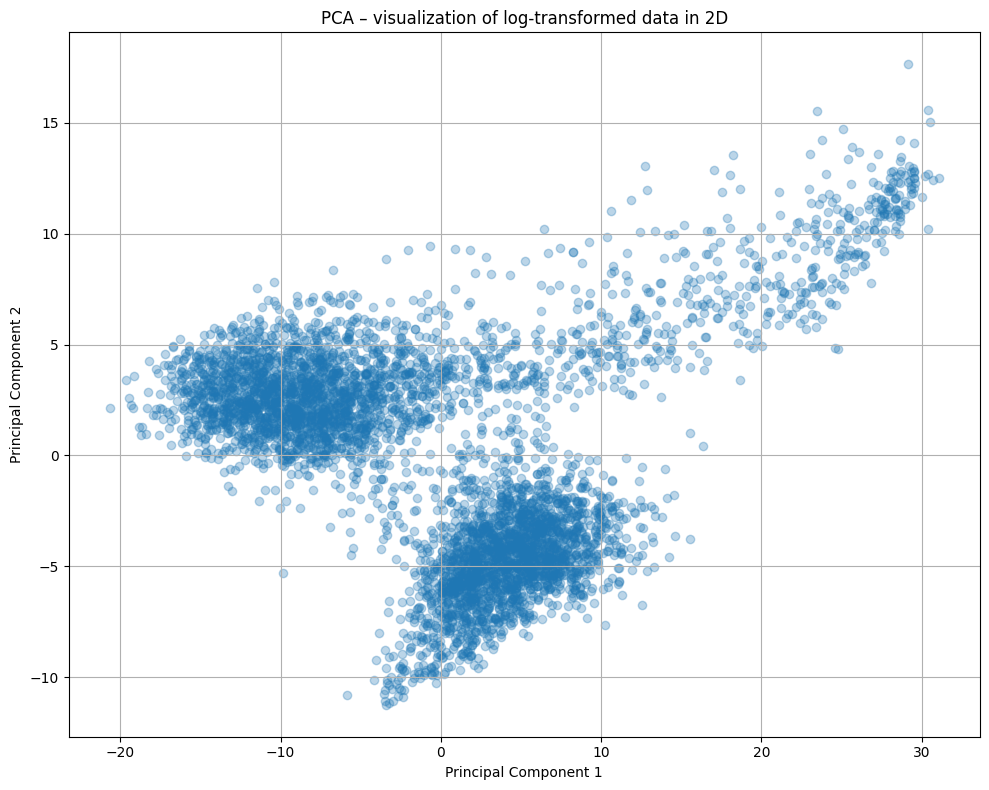

In [17]:
epsilon = 1e-10
X_log = np.log(X + epsilon)

pca_log = PCA(n_components=2)
X_pca_log = pca_log.fit_transform(X_log)
variance_log = np.sum(pca_log.explained_variance_ratio_)
print(f"Explained variance in 2D (LOG-TRANSFORMED DATA): {variance_log:.4f}")

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_pca_log[:, 0], X_pca_log[:, 1], alpha=0.3)
plt.title("PCA – visualization of log-transformed data in 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

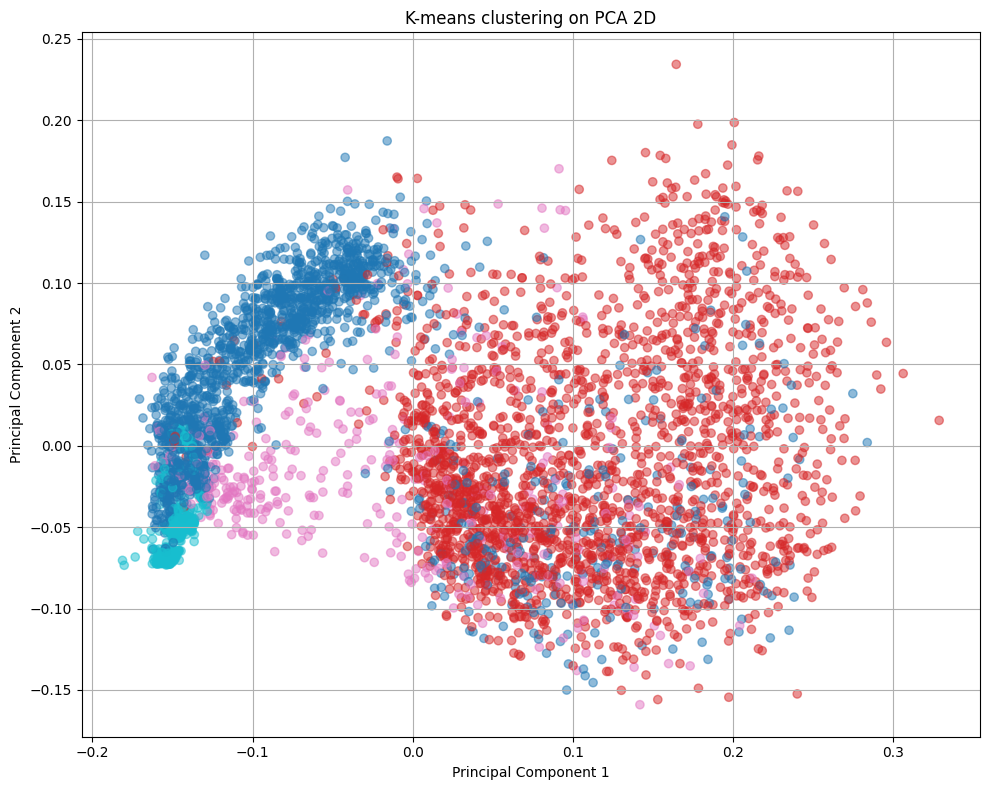

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_log)
labels_km = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_km, cmap='tab10', alpha=0.5)
plt.title("K-means clustering on PCA 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

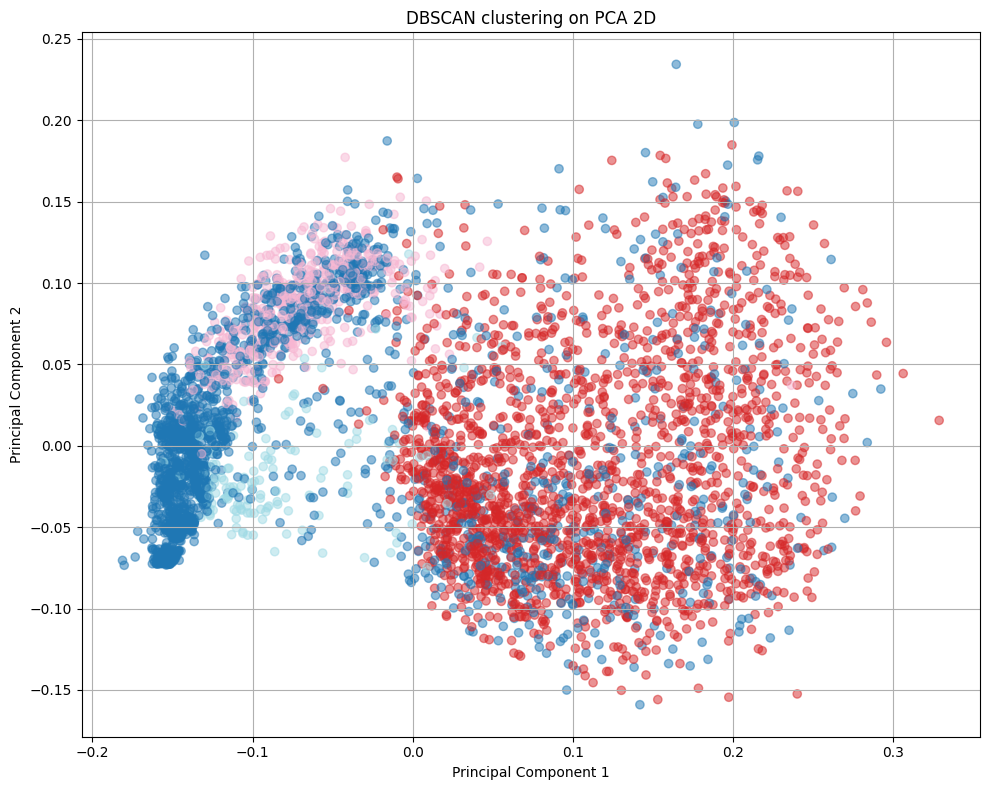

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=6, min_samples=100)
dbscan.fit(X_log)
labels_db = dbscan.labels_

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_db, cmap='tab20', alpha=0.5)
plt.title("DBSCAN clustering on PCA 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

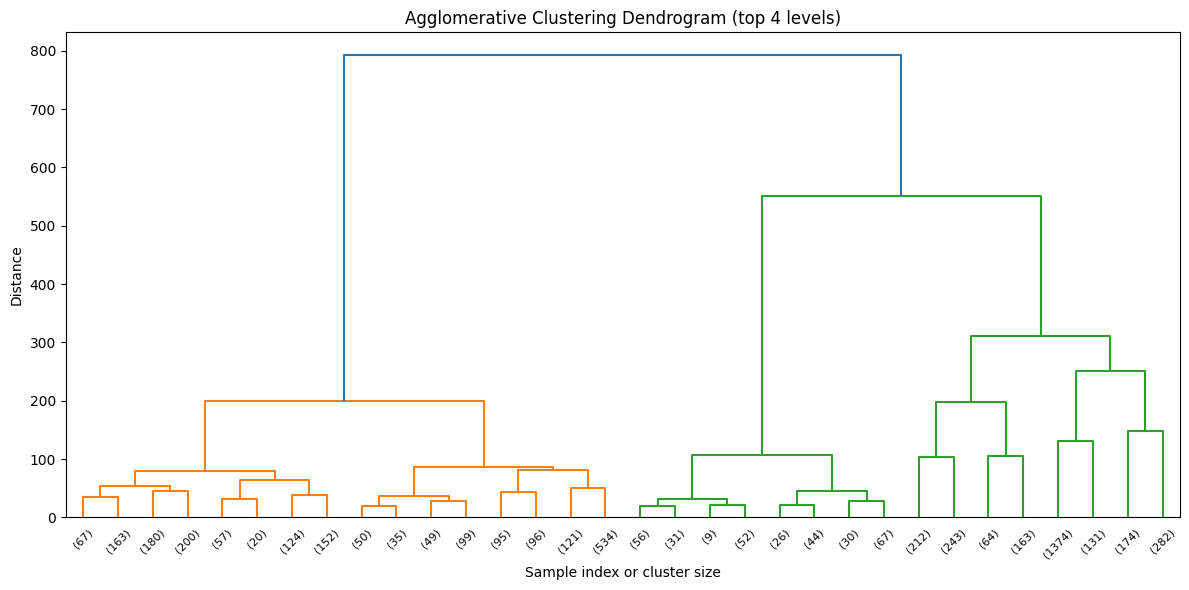

In [20]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([
        model.children_, 
        model.distances_, 
        counts
    ]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_log)

plt.figure(figsize=(12, 6))
plot_dendrogram(model, truncate_mode='level', p=4)
plt.title("Agglomerative Clustering Dendrogram (top 4 levels)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

Po wzbogaceniu zbioru o próbki z instrumentu muzycznego struktura danych uległa wyraźnej zmianie. PCA w 2D dla danych oryginalnych zachowało 69% wariancji, a po logarytmicznej transformacji 69.44%, co oznacza minimalny zysk, jednak wizualizacja stała się wyraźniejsza. W przestrzeni PCA można zauważyć dwie główne, dobrze odseparowane grupy. Zarówno k-means, jak i DBSCAN (dla odpowiednio dobranego eps) dzielą dane na dwie zbliżone liczebnie klastry, co sugeruje, że obecność próbek instrumentu znacząco wpłynęła na strukturę skupień, czyniąc ją bardziej wyrazistą niż w przypadku samej mowy.

Dodatkowo, dendrogram uzyskany z AgglomerativeClustering pokazuje, że jedna z tych dwóch głównych grup dzieli się dalej na dwie podgrupy, co może wskazywać, że ta część danych zawiera próbki mowy – zgodnie z wcześniejszym zadaniem, gdzie dane mowy wykazywały wewnętrzną strukturę. Można więc przypuszczać, że druga, bardziej jednorodna grupa odpowiada próbkowaniu instrumentu muzycznego.

Na podstawie wyników trzech algorytmów można zidentyfikować zmianę struktury – pojawienie się nowej klasy danych (instrumentu) spowodowało wyraźniejsze skupienia. Chociaż nie mamy etykiet, silna separacja oraz zgodność wyników różnych metod wskazuje na obecność istotnych różnic w danych. Aby zweryfikować hipotezy co do przyporządkowania klastrów do źródeł (mowa vs instrument), można obliczyć podobieństwo do grup z poprzedniego zadania.